In [3]:
# numpy & pandas
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
# stats
from scipy import stats
# plots
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style='white', color_codes=True)

# needed in jupyter notebooks
%matplotlib inline

(array([ 2.,  1.,  7., 18., 15., 16., 12., 12., 12.,  5.]),
 array([-2.61746899, -2.12096161, -1.62445422, -1.12794684, -0.63143946,
        -0.13493207,  0.36157531,  0.85808269,  1.35459007,  1.85109746,
         2.34760484]),
 <a list of 10 Patch objects>)

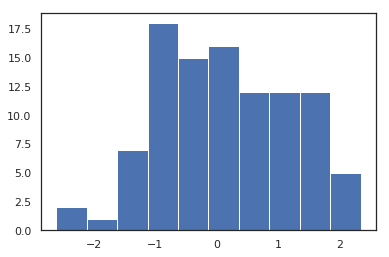

In [2]:
# histogram (basic)
data = np.random.randn(100)
plt.hist(data)

(array([0.    , 0.    , 0.1125, 0.2875, 0.475 , 0.1125, 0.0125, 0.    ]),
 array([-4, -3, -2, -1,  0,  1,  2,  3,  4]),
 <a list of 8 Patch objects>)

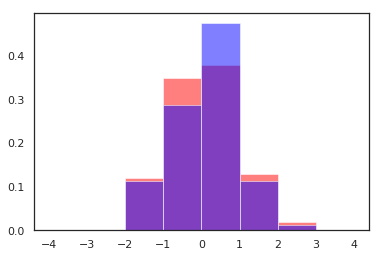

In [3]:
# display multiple ds
ds1 = np.random.randn(100)
ds2 = np.random.randn(80)
plt.hist(ds1, density=True,color='red',alpha=.5,bins=[-4,-3,-2,-1,0,1,2,3,4])
plt.hist(ds2, density=True,color='blue',alpha=.5,bins=[-4,-3,-2,-1,0,1,2,3,4])

(array([0.04017231, 0.08034461, 0.14060307, 0.18077538, 0.34146461,
        0.48206769, 0.40172307, 0.18077538, 0.12051692, 0.04017231]),
 array([-2.62510785, -2.12725245, -1.62939705, -1.13154165, -0.63368625,
        -0.13583085,  0.36202455,  0.85987995,  1.35773535,  1.85559075,
         2.35344615]),
 <a list of 10 Patch objects>)

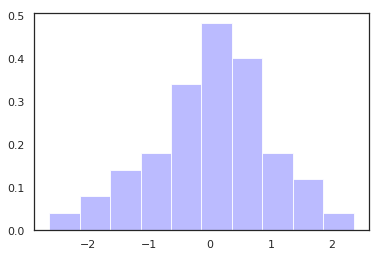

In [4]:
# plt with params
ds3 = np.random.randn(100)
plt.hist(
    ds3,
    alpha=.8,
    bins=10, # int -- number of equal bins (default 10), list -- edges of bins ([1,2,3,4])
    histtype='bar', # bar (traditional), barstacked, step (generates lineplot), stepfilled
    align='mid', # left (centered on left bin edge), mid, right
    orientation='vertical', # vertical, horizontal
    color='#aaaaff', # str -- color, list -- colors (1:1 color:ds ratio)
    label='label1', # str -- label, list -- labels for multiple datasets
    density=True # idk lol
)

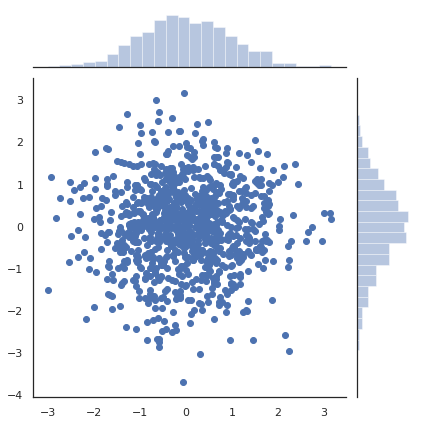

In [5]:
# jointplot (basic)
ds1 = np.random.randn(1000)
ds2 = np.random.randn(1000)
sns.jointplot(ds1,ds2)

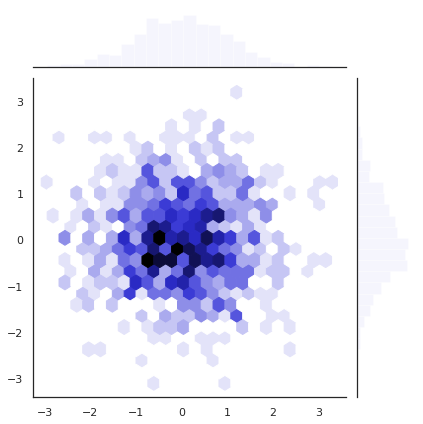

In [6]:
# jointplot (hex)
ds1 = np.random.randn(1000)
ds2 = np.random.randn(1000)
sns.jointplot(
    kind='hex', # scatter, reg, resid, kde (density), hex
    color='lavender', # color to use (matplotlib colors)
    x=ds1, # ds for x
    y=ds2, # ds for y
)


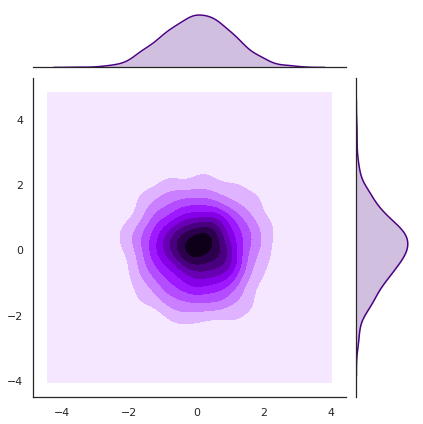

In [7]:

# jointplot (kde -- kernel density estimation plot)
ds1 = np.random.randn(1000)
ds2 = np.random.randn(1000)
sns.jointplot(
    kind='kde', # scatter, reg, resid, kde (density), hex
    color='indigo', # color to use (matplotlib colors)
    x=ds1, # ds for x
    y=ds2, # ds for y
)

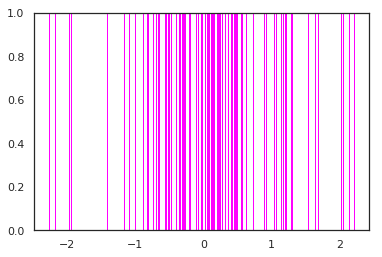

In [16]:
# rugplot
ds1 = np.random.randn(100)
sns.rugplot(ds1, height=1, axis='x', color='fuchsia')

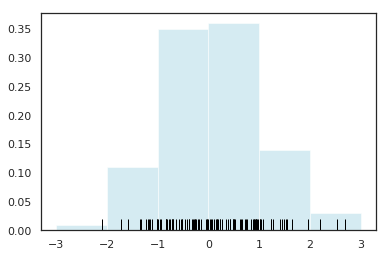

In [20]:
# rugplot with histogram
ds1 = np.random.randn(100)
plt.hist(ds1, density=True,color='lightblue',alpha=.5,bins=[-3,-2,-1,0,1,2,3])
sns.rugplot(ds1, height=.05, axis='x', color='black')

(0, 1)

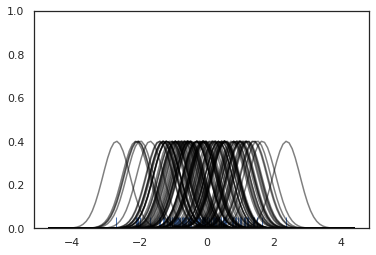

In [5]:
# manual kde (create kernels)
ds1 = np.random.randn(100) # data set
sns.rugplot(ds1)
x_min = ds1.min() - 2 # left bound
x_max = ds1.max() + 2 # right bound
x_axis = np.linspace(x_min, x_max, 100) # 100 equally spaced points between min/max
bandwidth = ((4 * (ds1.std() ** 5)) / (3 * len(ds1)))**(1/5) # bandwidth
kernel_list = []
for data_point in ds1:
    # create kernel for each point, append to kernel_list
    kernel = stats.norm(data_point, bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    # scale for plotting
    kernel = kernel / kernel.max()
    kernel = kernel * 0.4
    # plot
    plt.plot(x_axis, kernel, color='black', alpha=0.5)
# limit y axis
plt.ylim(0,1)

Text(0.5, 0.98, 'Sum of basis functions')

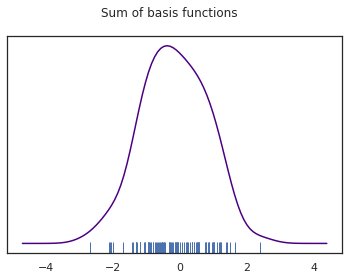

In [7]:
# manual kde (sum kernels)
sum_of_kde = np.sum(kernel_list, axis=0) # get sum
fig = plt.plot(x_axis, sum_of_kde, color='indigo') # plot sum
sns.rugplot(ds1) # rugplot
plt.yticks([]) # clear ticks
plt.suptitle('Sum of basis functions')

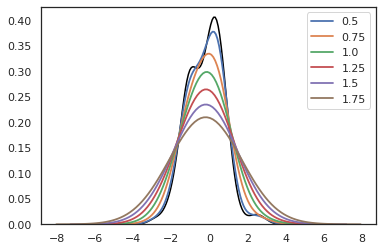

In [10]:
# seaborn kde (various bandwidths)
ds1 = np.random.randn(100) # data set
sns.kdeplot(ds1, color='black') # auto bw
for bw in np.arange(.5, 2, .25):
    sns.kdeplot(ds1, bw=bw, lw=1.8, label=bw) # manual bw

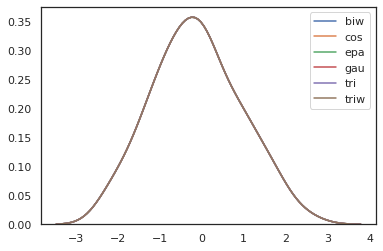

In [15]:
# seaborn kde (different kernels)
ds1 = np.random.randn(100) # data set
kernel_options = ['biw', 'cos', 'epa', 'gau', 'tri', 'triw']
for k in kernel_options:
    sns.kdeplot(ds1, kernel=k, label=k)
    
# not displaying all ????

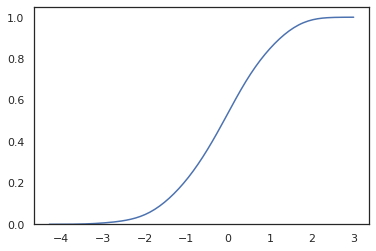

In [2]:
# cdf (cumulative distribution function)
ds1 = np.random.randn(100) # data set
sns.kdeplot(ds1, cumulative=True)

# requires statsmodels (pip install statsmodels)

/home/jly36963/miniconda3/envs/mydataenv/lib/python3.7/site-packages/seaborn/distributions.py:679: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)


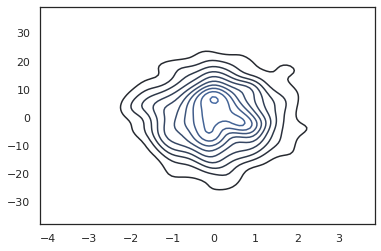

In [3]:
# kde (multivariate)
mean = [0,0] # mean
cov = [[1,0], [0,100]] # covariance
ds2 = np.random.multivariate_normal(mean=mean, cov=cov, size=1000) # multivariate normal distribution
df1 = pd.DataFrame(ds2, columns=['X','Y']) # dataset as dataframe
sns.kdeplot(df1) # kdeplot of dataframe

## deprecated (use bivariate plot -- 'kdeplot(x,y)')



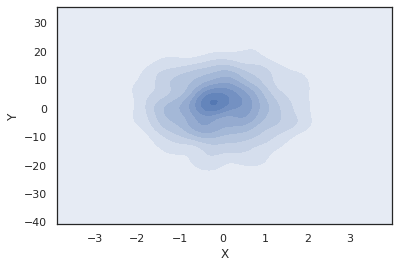

In [4]:
# kde (multivariate) (multiple vectors)
mean = [0,0] # mean
cov = [[1,0], [0,100]] # covariance
ds2 = np.random.multivariate_normal(mean=mean, cov=cov, size=1000) # multivariate normal distribution
df1 = pd.DataFrame(ds2, columns=['X','Y']) # dataset as dataframe
sns.kdeplot(df1['X'], df1['Y'], shade=True)

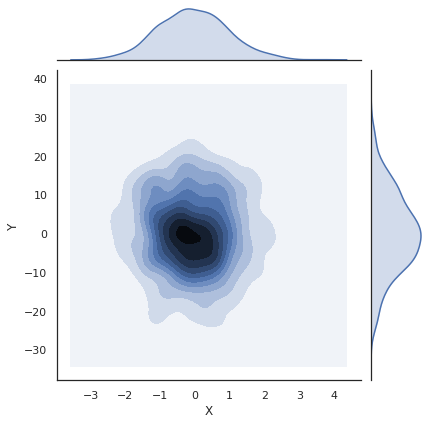

In [5]:
# kde jointplot
mean = [0,0] # mean
cov = [[1,0], [0,100]] # covariance
ds2 = np.random.multivariate_normal(mean=mean, cov=cov, size=1000) # multivariate normal distribution
df1 = pd.DataFrame(ds2, columns=['X','Y']) # dataset as dataframe
sns.jointplot('X', 'Y', df1, kind='kde')

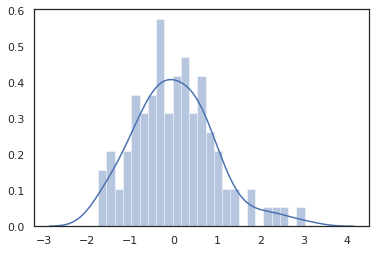

In [6]:
# default (histogram + kde)
ds1 = np.random.randn(100)
sns.distplot(ds1, bins=25) # bins default 10

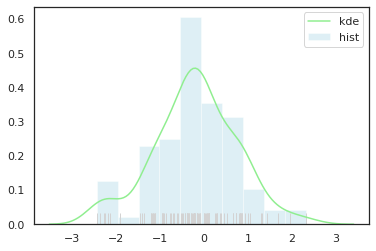

In [22]:
# distplot (histogram + kde + rugplot)
ds1 = np.random.randn(100)
sns.distplot(
    ds1, 
    hist=True, hist_kws={'color': 'lightblue', 'label': 'hist'},
    kde=True, kde_kws={'color': 'lightgreen', 'label': 'kde'},
    rug=True, rug_kws={'color': 'lightgray', 'label': 'rug'}
)

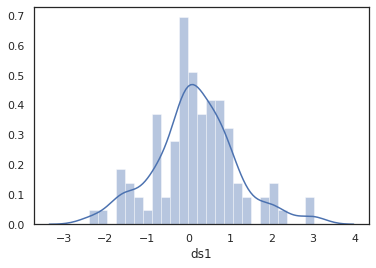

In [23]:
# distplot (with series)
ds1 = np.random.randn(100)
srs1 = pd.Series(ds1, name='ds1')
sns.distplot(srs1, bins=25)

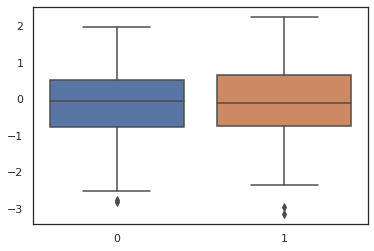

In [15]:
# box plot
    # 5 key components
        # first quartile, median, third quartile
        # min (Q1 - 1.5 * IQR, not lowest value), max (Q3 + 1.5 * IQR, not highest value)
            # IQR -- interquartile range (distance between Q1 & Q3)
            # outliers lie beyond min/max
    # ends cover min/max, box covers first-third quartile, line over median

ds1 = np.random.randn(100)
ds2 = np.random.randn(100)
sns.boxplot(data=[ds1, ds2])

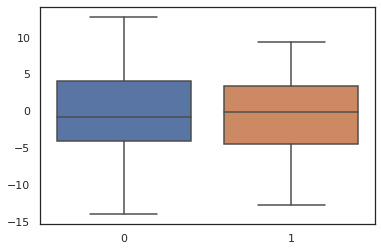

In [14]:
# violin plot
ds1 = stats.norm(0,5).rvs(100) # normal distribution, 100 points
ds2 = np.concatenate([
    stats.gamma(5).rvs(50) - 1,
    stats.gamma(5).rvs(50) * (-1)
]) # gamma distribution, 50 points

# boxplot (why we may need violin plot)
sns.boxplot(data=[ds1,ds2])

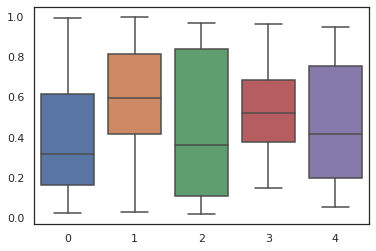

In [16]:
# boxplots
np.random.seed(111)

all_arr = [np.random.uniform(size=20),
           np.random.uniform(size=20),
           np.random.uniform(size=20),
           np.random.uniform(size=20),
           np.random.uniform(size=20)]

sns.boxplot(data=all_arr)

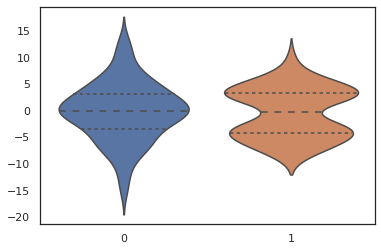

In [25]:
# violin plot
ds1 = stats.norm(0,5).rvs(100) # normal distribution, 100 points
ds2 = np.concatenate([
    stats.gamma(5).rvs(50) - 1,
    stats.gamma(5).rvs(50) * (-1)
]) # gamma distribution, 50 points

sns.violinplot(data=[ds1,ds2], inner='quartile')

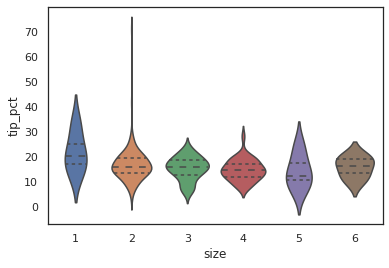

In [75]:
# violin plot (version 2)
tips = sns.load_dataset('tips') # example dataset (df)
tips['tip_pct'] = 100*(tips['tip']/tips['total_bill'])
sns.violinplot(x='size', y='tip_pct', data=tips, inner='quartile')

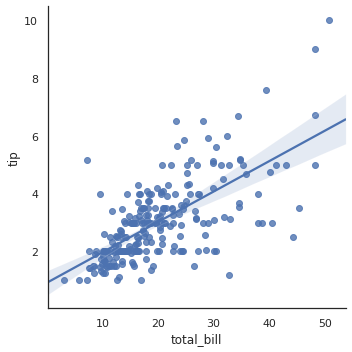

In [26]:
# linear regression
tips = sns.load_dataset('tips') # example dataset (df)
tips.head() # first 5 rows
sns.lmplot(x='total_bill', y='tip', data=tips) # col1, col2, df


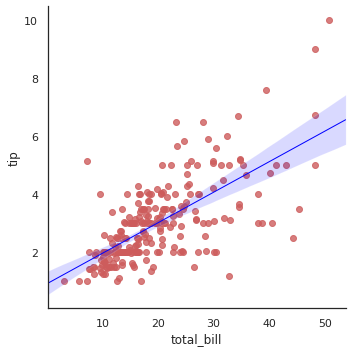

In [27]:
# linear regression (custom)
tips = sns.load_dataset('tips') # example dataset (df)
tips.head() # first 5 rows
sns.lmplot(
    x='total_bill', y='tip', data=tips,
    scatter_kws={'marker':'o', 'color':'indianred'},
    line_kws={'linewidth':1, 'color':'blue'}
)

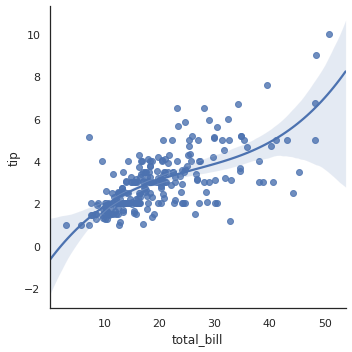

In [29]:
# linear regression (higher order polynomials)
tips = sns.load_dataset('tips') # example dataset (df)
tips.head() # first 5 rows
sns.lmplot(x='total_bill', y='tip', data=tips, order=3) # third order polynomial

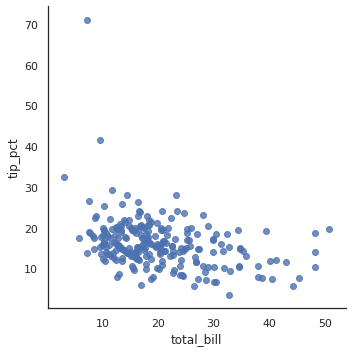

In [33]:
# linear regression (no fit)
tips = sns.load_dataset('tips') # example dataset (df)
tips['tip_pct'] = 100*(tips['tip']/tips['total_bill'])
sns.lmplot(x='total_bill', y='tip_pct', data=tips, fit_reg=False)

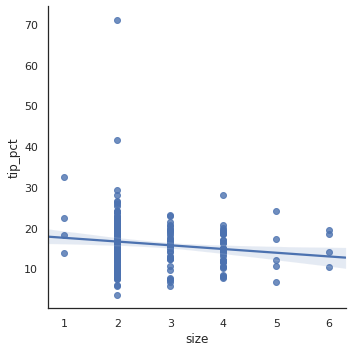

In [34]:
# linear regression (discrete)
tips = sns.load_dataset('tips') # example dataset (df)
tips['tip_pct'] = 100*(tips['tip']/tips['total_bill'])
sns.lmplot(x='size', y='tip_pct', data=tips) # size of party, tip percent

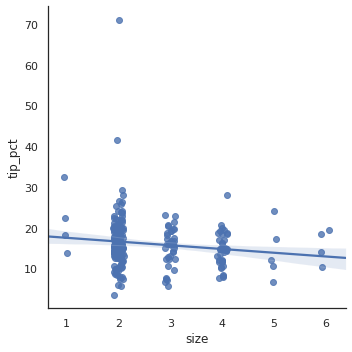

In [36]:
# linear regression (jitter)
tips = sns.load_dataset('tips') # example dataset (df)
tips['tip_pct'] = 100*(tips['tip']/tips['total_bill'])
sns.lmplot(x='size', y='tip_pct', data=tips, x_jitter=.1)

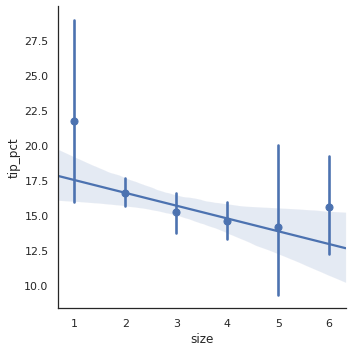

In [40]:
# linear regression (estimator)
tips = sns.load_dataset('tips') # example dataset (df)
tips['tip_pct'] = 100*(tips['tip']/tips['total_bill'])
sns.lmplot(x='size', y='tip_pct', data=tips, x_estimator=np.mean)

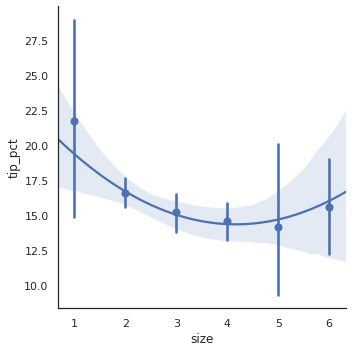

In [41]:
# linear regression (estimator) (order)
tips = sns.load_dataset('tips') # example dataset (df)
tips['tip_pct'] = 100*(tips['tip']/tips['total_bill'])
sns.lmplot(x='size', y='tip_pct', data=tips, x_estimator=np.mean, order=2)

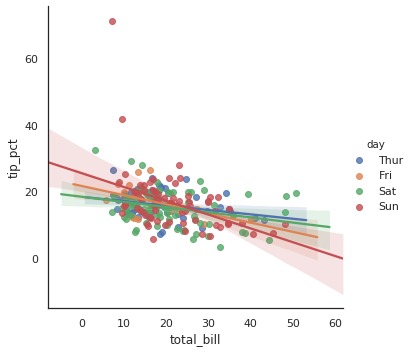

In [43]:
# linear regression (hue) (categorize)
tips = sns.load_dataset('tips') # example dataset (df)
tips['tip_pct'] = 100*(tips['tip']/tips['total_bill'])
sns.lmplot(x='total_bill', y='tip_pct', data=tips, hue='day') # categorize by day


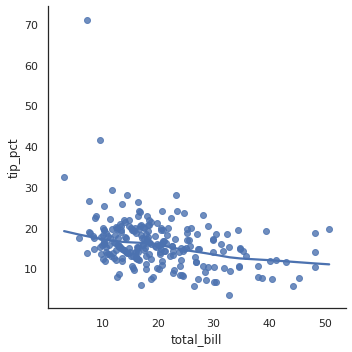

In [44]:
# local regression (LOESS)
tips = sns.load_dataset('tips') # example dataset (df)
tips['tip_pct'] = 100*(tips['tip']/tips['total_bill'])
sns.lmplot(x='total_bill', y='tip_pct', data=tips, lowess=True)

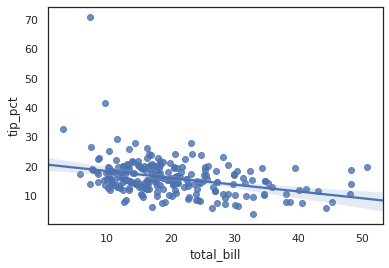

In [45]:
# regplot 
tips = sns.load_dataset('tips') # example dataset (df)
tips['tip_pct'] = 100*(tips['tip']/tips['total_bill'])
sns.regplot(x='total_bill', y='tip_pct', data=tips)

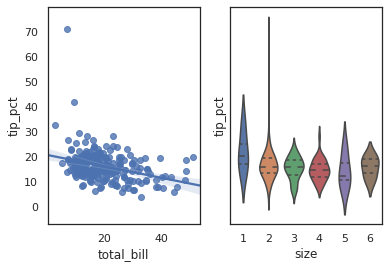

In [73]:
# regplot + violinplot (subplots) (NOT WORKING)
tips = sns.load_dataset('tips') # example dataset (df)
tips['tip_pct'] = 100*(tips['tip']/tips['total_bill'])
fig, (axis1, axis2) = plt.subplots(nrows=1, ncols=2, sharey=True)
sns.regplot(x='total_bill', y='tip_pct', data=tips, ax=axis1)
sns.violinplot(x='size', y='tip_pct', data=tips, ax=axis2, inner='quartile')


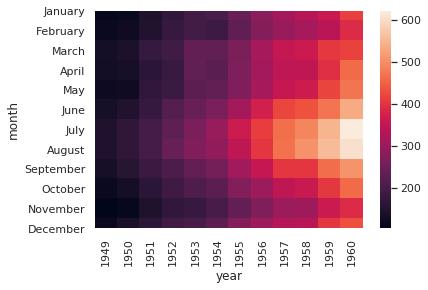

In [76]:
# heatmap
df_flight = sns.load_dataset('flights') # sample dataset (df)
df_flight = df_flight.pivot(index='month', columns='year', values='passengers') # pivot table
sns.heatmap(df_flight)

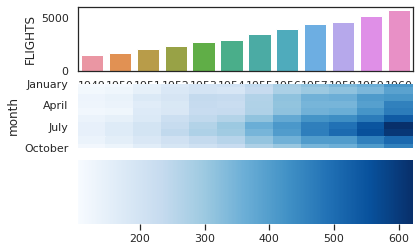

In [85]:
# heatmap + barplot (subplots)
df_flight = sns.load_dataset('flights') # sample dataset (df)
df_flight = df_flight.pivot(index='month', columns='year', values='passengers') # pivot table
fig, (axis1, axis2, axis3) = plt.subplots(nrows=3,ncols=1)
srs_fpy = df_flight.sum() # sum of flights per year
srs_years = pd.Series(srs_fpy.index.values)
df_years = pd.DataFrame(srs_years)
srs_flights = pd.Series(srs_fpy.values)
df_flights = pd.DataFrame(srs_flights)
df1 = pd.concat((df_years, df_flights), axis=1)
df1.columns = ['YEAR', 'FLIGHTS']

sns.barplot(x='YEAR', y='FLIGHTS', data=df1, ax=axis1)
sns.heatmap(df_flight, cmap='Blues', ax=axis2, cbar_ax=axis3, cbar_kws={'orientation':'horizontal'})

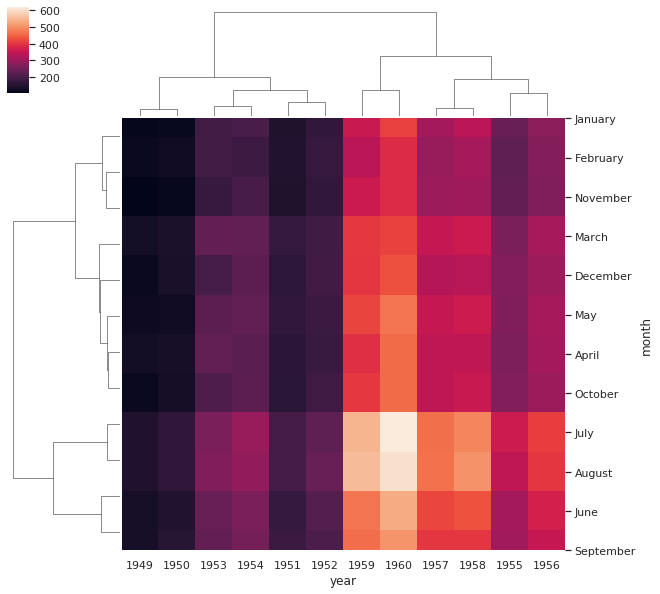

In [87]:
# cluster map
df_flight = sns.load_dataset('flights') # sample dataset (df)
df_flight = df_flight.pivot(index='month', columns='year', values='passengers') # pivot table
sns.clustermap(df_flight) # args: col_cluster, row_cluster, standard_scale, z_score

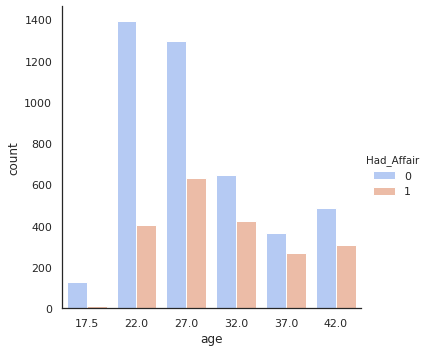

In [4]:
# ---------------
# categorical plot
# ---------------

import statsmodels.api as sm
# dataset as df
df1 = sm.datasets.fair.load_pandas().data
# create 'Had_Affair' col
df1['Had_Affair'] = df1['affairs'].apply(lambda x: 0 if x==0 else 1)
# compare
df2 = df1.groupby('Had_Affair').mean().applymap(lambda x: round(x,1))
# plot (categorical plot)
sns.catplot(x='age', data=df1, kind='count', hue='Had_Affair', palette='coolwarm')

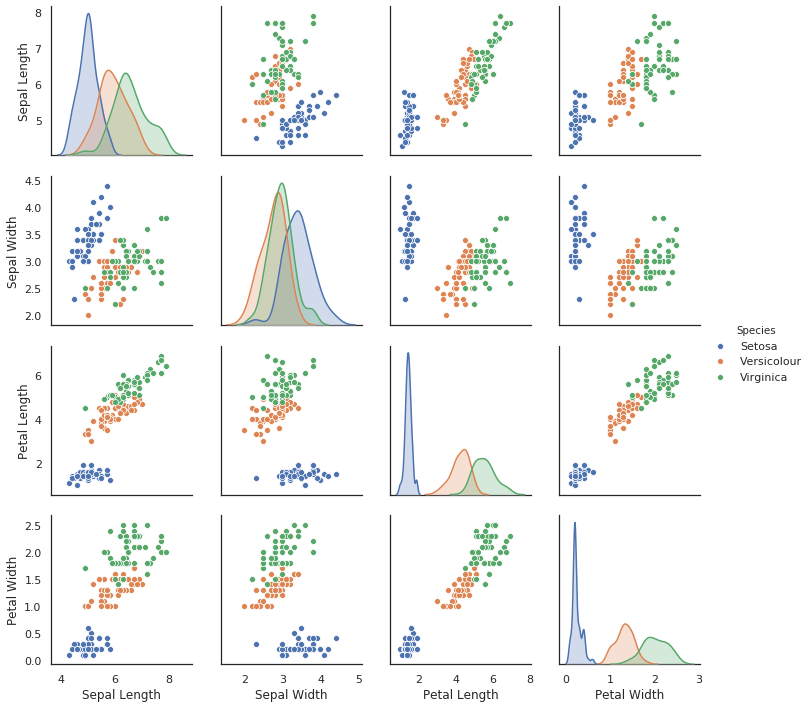

In [5]:
# ---------------
# sns.pairplot
# ---------------

# import dataset
from sklearn.datasets import load_iris
# extract dataset
iris = load_iris()
x = iris.data
y = iris.target
# get df from dataset
df_x = pd.DataFrame(x,columns=['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width'])
df_y = pd.DataFrame(y, columns=['Species'])
# replace
df_y = df_y.replace({0 : 'Setosa', 1 : 'Versicolour', 2 : 'Virginica'})
# combine
df1 = pd.concat([df_x, df_y], axis=1)
# visualize
sns.pairplot(df1, hue='Species')